## IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATASET

In [2]:
df = pd.read_csv("smartphone_battery_life_analysis_final.csv")
df.head()

,Brand,Model,Release_Year,Category,Price_USD,Screen_Size_Inches,Processor_Type,RAM_GB,Storage_GB,OS,...,Cycle_Count,Temperature_While_Charging_C,Discharge_Rate_mAh_per_hour,Idle_Discharge_Per_Hour,Thermal_Throttling_Effect,Battery_Saver_Mode_Available,Battery_Saver_Mode_Effect,Power_Consumption_Watt,Efficiency_Score,Refresh_Rate_Hz
0,Apple,Apple 12,2021,Midrange,1142.45,6.5,Apple A16 Bionic,8,128,iOS 16,...,348,42.7,575.1,12.1,No,No,0.18,3.12,0.0018,90
1,Xiaomi,Xiaomi S26,2018,Budget,1123.65,6.5,Snapdragon 8 Gen 1,4,64,Android 13,...,84,38.1,343.2,6.2,No,Yes,0.17,5.56,0.0024,120
2,Motorola,Motorola Note11,2022,Budget,622.21,5.5,Snapdragon 778G,16,64,Android 12,...,533,32.1,583.3,7.1,Yes,Yes,0.33,4.87,0.0025,60
3,Google,Google X21,2024,Midrange,1077.14,6.7,MediaTek Dimensity 9200,8,64,Android 12,...,312,32.8,266.1,12.1,Yes,Yes,0.40,3.71,0.0032,90
4,Vivo,Vivo Max26,2022,Flagship,1294.57,6.4,Snapdragon 8 Gen 1,8,256,Android 12,...,183,37.4,530.7,7.3,Yes,Yes,0.35,2.95,0.0029,120


## DATA CLEANING

In [3]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

# Fill missing numeric values with mean
df_cleaned.fillna(df_cleaned.mean(numeric_only=True), inplace=True)

# Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

df_cleaned

,brand,model,release_year,category,price_usd,screen_size_inches,processor_type,ram_gb,storage_gb,os,...,cycle_count,temperature_while_charging_c,discharge_rate_mah_per_hour,idle_discharge_per_hour,thermal_throttling_effect,battery_saver_mode_available,battery_saver_mode_effect,power_consumption_watt,efficiency_score,refresh_rate_hz
0,Apple,Apple 12,2021,Midrange,1142.45,6.5,Apple A16 Bionic,8,128,iOS 16,...,348,42.7,575.1,12.1,No,No,0.18,3.12,0.0018,90
1,Xiaomi,Xiaomi S26,2018,Budget,1123.65,6.5,Snapdragon 8 Gen 1,4,64,Android 13,...,84,38.1,343.2,6.2,No,Yes,0.17,5.56,0.0024,120
2,Motorola,Motorola Note11,2022,Budget,622.21,5.5,Snapdragon 778G,16,64,Android 12,...,533,32.1,583.3,7.1,Yes,Yes,0.33,4.87,0.0025,60
3,Google,Google X21,2024,Midrange,1077.14,6.7,MediaTek Dimensity 9200,8,64,Android 12,...,312,32.8,266.1,12.1,Yes,Yes,0.40,3.71,0.0032,90
4,Vivo,Vivo Max26,2022,Flagship,1294.57,6.4,Snapdragon 8 Gen 1,8,256,Android 12,...,183,37.4,530.7,7.3,Yes,Yes,0.35,2.95,0.0029,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,OnePlus,OnePlus Pro27,2021,Flagship,1244.10,6.4,MediaTek Dimensity 9200,16,512,Android 14,...,157,41.3,382.2,10.7,No,Yes,0.21,3.62,0.0020,60
2995,OnePlus,OnePlus A2,2019,Budget,218.35,6.5,Tensor G2,16,128,Android 15,...,119,34.9,477.9,7.0,Yes,Yes,0.14,2.57,0.0017,120
2996,Samsung,Samsung Note4,2020,Midrange,841.24,6.4,Exynos 2100,12,128,Android 14,...,424,42.8,490.9,14.8,Yes,Yes,0.40,4.72,0.0032,120
2997,Asus,Asus Pro2,2023,Midrange,743.41,6.7,Tensor G2,6,128,Android 12,...,419,33.0,538.5,15.4,Yes,No,0.29,3.42,0.0020,90


## DATA FILTERING

In [ ]:
# Filter phones with battery > 5000 mAh
battery_filter = df_cleaned[df_cleaned['battery_capacity_mah'] > 5000]
battery_filter

In [5]:
# Phones with battery health < 80%
low_battery_health = df_cleaned[df_cleaned['battery_health_percentage'] < 80]
print("Low Battery Health Phones (<80%):", len(low_battery_health))
low_battery_health

Low Battery Health Phones (<80%): 0


,brand,model,release_year,category,price_usd,screen_size_inches,processor_type,ram_gb,storage_gb,os,...,cycle_count,temperature_while_charging_c,discharge_rate_mah_per_hour,idle_discharge_per_hour,thermal_throttling_effect,battery_saver_mode_available,battery_saver_mode_effect,power_consumption_watt,efficiency_score,refresh_rate_hz


In [6]:
# Phones with slow charging (charging time > 100 mins)
slow_charging_phones = df_cleaned[df_cleaned['charging_time_0_to_100'] > 100]
print("Slow Charging Phones (>100 mins):", len(slow_charging_phones))
slow_charging_phones

Slow Charging Phones (>100 mins): 687


,brand,model,release_year,category,price_usd,screen_size_inches,processor_type,ram_gb,storage_gb,os,...,cycle_count,temperature_while_charging_c,discharge_rate_mah_per_hour,idle_discharge_per_hour,thermal_throttling_effect,battery_saver_mode_available,battery_saver_mode_effect,power_consumption_watt,efficiency_score,refresh_rate_hz
8,OnePlus,OnePlus Pro7,2019,Midrange,461.98,6.5,Snapdragon 8 Gen 2,4,64,Android 12,...,255,35.7,295.0,16.5,No,Yes,0.22,5.84,0.0018,144
9,Asus,Asus Note6,2022,Midrange,1211.82,6.8,Tensor G2,4,128,Android 12,...,154,41.9,596.2,11.6,Yes,Yes,0.24,5.54,0.0014,60
17,Apple,Apple A30,2018,Budget,188.76,6.8,Apple A16 Bionic,12,128,iOS 17,...,596,43.1,489.0,9.9,Yes,Yes,0.11,5.45,0.0025,90
24,Oppo,Oppo Note27,2019,Budget,896.32,6.8,MediaTek Dimensity 9200,12,512,Android 13,...,559,44.2,474.5,10.1,No,Yes,0.38,2.55,0.0040,144
27,OnePlus,OnePlus X22,2018,Midrange,493.91,6.4,Exynos 2100,4,512,Android 13,...,26,34.2,214.9,11.0,No,Yes,0.39,3.92,0.0024,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,Google,Google A20,2022,Budget,988.13,6.5,Tensor G2,4,256,Android 13,...,26,30.6,442.3,10.9,No,Yes,0.22,2.51,0.0034,144
2981,Asus,Asus Pro26,2020,Budget,621.43,6.8,MediaTek Dimensity 9200,4,512,Android 12,...,365,35.6,474.5,16.8,Yes,Yes,0.24,2.14,0.0023,120
2983,Asus,Asus S15,2023,Midrange,202.85,6.8,Snapdragon 778G,16,512,Android 11,...,528,32.6,421.4,7.4,Yes,Yes,0.20,4.13,0.0026,144
2990,Apple,Apple Note4,2022,Flagship,350.99,6.4,Apple A16 Bionic,6,512,iOS 17,...,405,31.8,325.8,8.9,Yes,No,0.36,6.60,0.0057,60


## DATA EXPLORATION

In [7]:
print("Shape:", df_cleaned.shape)

Shape: (2999, 44)


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         2999 non-null   object 
 1   model                         2999 non-null   object 
 2   release_year                  2999 non-null   int64  
 3   category                      2999 non-null   object 
 4   price_usd                     2999 non-null   float64
 5   screen_size_inches            2999 non-null   float64
 6   processor_type                2999 non-null   object 
 7   ram_gb                        2999 non-null   int64  
 8   storage_gb                    2999 non-null   int64  
 9   os                            2999 non-null   object 
 10  battery_capacity_mah          2999 non-null   int64  
 11  typical_capacity_mah          2999 non-null   int64  
 12  rated_capacity_mah            2999 non-null   int64  
 13  bat

In [9]:
print("Columns:", df_cleaned.columns)

Columns: Index(['brand', 'model', 'release_year', 'category', 'price_usd',
       'screen_size_inches', 'processor_type', 'ram_gb', 'storage_gb', 'os',
       'battery_capacity_mah', 'typical_capacity_mah', 'rated_capacity_mah',
       'battery_life_hours', 'standby_time_hours', 'talk_time_hours',
       'video_playback_hours', 'web_browsing_hours', 'music_playback_hours',
       'gaming_test_hours', 'usage_scenario', 'battery_endurance_rating',
       'battery_type', 'removable_battery', 'charging_time_0_to_100',
       'charging_time_0_to_50', 'charging_wattage', 'charging_technology',
       'fast_charging_supported', 'fast_charging_tech', 'wireless_charging',
       'wireless_charging_wattage', 'reverse_wireless_charging',
       'battery_health_percentage', 'cycle_count',
       'temperature_while_charging_c', 'discharge_rate_mah_per_hour',
       'idle_discharge_per_hour', 'thermal_throttling_effect',
       'battery_saver_mode_available', 'battery_saver_mode_effect',
       'pow

In [10]:
print("Null values:\n", df_cleaned.isnull().sum())

Null values:
 brand                             0
model                             0
release_year                      0
category                          0
price_usd                         0
screen_size_inches                0
processor_type                    0
ram_gb                            0
storage_gb                        0
os                                0
battery_capacity_mah              0
typical_capacity_mah              0
rated_capacity_mah                0
battery_life_hours                0
standby_time_hours                0
talk_time_hours                   0
video_playback_hours              0
web_browsing_hours                0
music_playback_hours              0
gaming_test_hours                 0
usage_scenario                    0
battery_endurance_rating          0
battery_type                      0
removable_battery                 0
charging_time_0_to_100            0
charging_time_0_to_50             0
charging_wattage                  0
charging_techn

In [11]:
print(df['Fast_Charging_Tech'])

0           Turbo Charge
1              SuperVOOC
2            Fast Charge
3           Turbo Charge
4            Warp Charge
              ...       
2994                 NaN
2995                VOOC
2996    Quick Charge 4.0
2997                 NaN
2998           SuperVOOC
Name: Fast_Charging_Tech, Length: 2999, dtype: object


In [12]:
print(df_cleaned['battery_type'])

0       Li-Ion
1       Li-Ion
2        Li-Po
3       Li-Ion
4       Li-Ion
         ...  
2994    Li-Ion
2995     Li-Po
2996    Li-Ion
2997     Li-Po
2998     Li-Po
Name: battery_type, Length: 2999, dtype: object


In [13]:
df_cleaned.describe()

,release_year,price_usd,screen_size_inches,ram_gb,storage_gb,battery_capacity_mah,typical_capacity_mah,rated_capacity_mah,battery_life_hours,standby_time_hours,...,wireless_charging_wattage,battery_health_percentage,cycle_count,temperature_while_charging_c,discharge_rate_mah_per_hour,idle_discharge_per_hour,battery_saver_mode_effect,power_consumption_watt,efficiency_score,refresh_rate_hz
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,...,2999.000000,2999.000000,2999.000000,2999.000000,2999.00000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,2020.978993,805.345975,6.291797,9.271757,237.412471,4325.275092,4374.171390,4275.426475,11.676125,550.169056,...,10.026676,92.518506,301.426142,37.443681,399.67886,12.400734,0.248910,4.985002,0.002841,103.434478
std,1.975135,407.094713,0.420084,4.349074,170.774401,978.921298,979.311162,979.636643,3.719620,145.326739,...,7.017748,4.543714,169.482137,4.359333,116.44608,4.325781,0.087208,1.726836,0.001133,31.476586
min,2018.000000,100.090000,5.500000,4.000000,64.000000,3000.000000,3000.000000,2900.000000,5.000000,300.000000,...,0.000000,85.000000,10.000000,30.000000,200.10000,5.000000,0.100000,2.000000,0.000800,60.000000
25%,2019.000000,461.200000,6.000000,6.000000,128.000000,3500.000000,3551.500000,3452.000000,8.600000,426.000000,...,5.000000,89.000000,154.000000,33.600000,298.55000,8.600000,0.170000,3.495000,0.002000,90.000000
50%,2021.000000,809.480000,6.400000,8.000000,128.000000,4000.000000,4097.000000,3998.000000,11.700000,549.000000,...,10.000000,93.000000,299.000000,37.400000,399.50000,12.400000,0.250000,4.970000,0.002700,90.000000
75%,2023.000000,1168.080000,6.700000,12.000000,256.000000,5000.000000,5050.000000,4948.000000,14.900000,674.000000,...,15.000000,96.000000,447.000000,41.300000,502.60000,16.100000,0.325000,6.475000,0.003600,120.000000
max,2024.000000,1499.940000,6.800000,16.000000,512.000000,6000.000000,6100.000000,6000.000000,18.000000,800.000000,...,20.000000,100.000000,600.000000,45.000000,600.00000,20.000000,0.400000,8.000000,0.006000,144.000000


In [14]:
df_cleaned.head(10)

,brand,model,release_year,category,price_usd,screen_size_inches,processor_type,ram_gb,storage_gb,os,...,cycle_count,temperature_while_charging_c,discharge_rate_mah_per_hour,idle_discharge_per_hour,thermal_throttling_effect,battery_saver_mode_available,battery_saver_mode_effect,power_consumption_watt,efficiency_score,refresh_rate_hz
0,Apple,Apple 12,2021,Midrange,1142.45,6.5,Apple A16 Bionic,8,128,iOS 16,...,348,42.7,575.1,12.1,No,No,0.18,3.12,0.0018,90
1,Xiaomi,Xiaomi S26,2018,Budget,1123.65,6.5,Snapdragon 8 Gen 1,4,64,Android 13,...,84,38.1,343.2,6.2,No,Yes,0.17,5.56,0.0024,120
2,Motorola,Motorola Note11,2022,Budget,622.21,5.5,Snapdragon 778G,16,64,Android 12,...,533,32.1,583.3,7.1,Yes,Yes,0.33,4.87,0.0025,60
3,Google,Google X21,2024,Midrange,1077.14,6.7,MediaTek Dimensity 9200,8,64,Android 12,...,312,32.8,266.1,12.1,Yes,Yes,0.40,3.71,0.0032,90
4,Vivo,Vivo Max26,2022,Flagship,1294.57,6.4,Snapdragon 8 Gen 1,8,256,Android 12,...,183,37.4,530.7,7.3,Yes,Yes,0.35,2.95,0.0029,120
5,OnePlus,OnePlus X1,2023,Midrange,1311.95,6.7,MediaTek Dimensity 9200,4,512,Android 12,...,586,36.7,464.6,11.3,No,No,0.37,4.54,0.0021,90
6,Google,Google Max13,2020,Flagship,123.59,6.0,Snapdragon 778G,4,256,Android 13,...,539,33.6,255.4,8.4,Yes,No,0.25,3.06,0.0038,90
7,Realme,Realme Max14,2018,Flagship,574.50,6.4,ediaTek Dimensity 7200,8,256,Android 13,...,89,35.8,337.6,17.3,Yes,No,0.13,5.64,0.0055,144
8,OnePlus,OnePlus Pro7,2019,Midrange,461.98,6.5,Snapdragon 8 Gen 2,4,64,Android 12,...,255,35.7,295.0,16.5,No,Yes,0.22,5.84,0.0018,144
9,Asus,Asus Note6,2022,Midrange,1211.82,6.8,Tensor G2,4,128,Android 12,...,154,41.9,596.2,11.6,Yes,Yes,0.24,5.54,0.0014,60


In [15]:
df_cleaned.tail(10)

,brand,model,release_year,category,price_usd,screen_size_inches,processor_type,ram_gb,storage_gb,os,...,cycle_count,temperature_while_charging_c,discharge_rate_mah_per_hour,idle_discharge_per_hour,thermal_throttling_effect,battery_saver_mode_available,battery_saver_mode_effect,power_consumption_watt,efficiency_score,refresh_rate_hz
2989,Realme,Realme Pro9,2024,Budget,1408.69,6.5,Snapdragon 8 Gen 1,12,128,Android 14,...,526,42.2,361.8,6.4,No,Yes,0.39,5.99,0.0017,90
2990,Apple,Apple Note4,2022,Flagship,350.99,6.4,Apple A16 Bionic,6,512,iOS 17,...,405,31.8,325.8,8.9,Yes,No,0.36,6.60,0.0057,60
2991,Oppo,Oppo Note29,2023,Midrange,411.82,6.8,MediaTek Dimensity 9200,12,512,Android 12,...,416,38.3,261.9,7.1,Yes,Yes,0.35,2.29,0.0021,60
2992,Oppo,Oppo X30,2024,Flagship,1297.65,6.0,MediaTek Dimensity 9200,6,128,Android 13,...,203,41.2,415.9,19.1,Yes,No,0.13,6.18,0.0044,60
2993,Vivo,Vivo A16,2022,Midrange,937.39,6.5,MediaTek Dimensity 9200,16,256,Android 11,...,212,42.4,211.9,13.7,No,No,0.36,8.00,0.0030,120
2994,OnePlus,OnePlus Pro27,2021,Flagship,1244.10,6.4,MediaTek Dimensity 9200,16,512,Android 14,...,157,41.3,382.2,10.7,No,Yes,0.21,3.62,0.0020,60
2995,OnePlus,OnePlus A2,2019,Budget,218.35,6.5,Tensor G2,16,128,Android 15,...,119,34.9,477.9,7.0,Yes,Yes,0.14,2.57,0.0017,120
2996,Samsung,Samsung Note4,2020,Midrange,841.24,6.4,Exynos 2100,12,128,Android 14,...,424,42.8,490.9,14.8,Yes,Yes,0.40,4.72,0.0032,120
2997,Asus,Asus Pro2,2023,Midrange,743.41,6.7,Tensor G2,6,128,Android 12,...,419,33.0,538.5,15.4,Yes,No,0.29,3.42,0.0020,90
2998,Vivo,Vivo Pro15,2019,Budget,184.04,6.1,Tensor G2,6,64,Android 15,...,446,42.1,503.7,14.3,Yes,Yes,0.21,2.68,0.0024,144


In [16]:
print("Category counts:")
df_cleaned['category'].value_counts()

Category counts:


category
Midrange    1013
Flagship    1010
Budget       976
Name: count, dtype: int64

In [17]:
print("Max Battery Capacity:", df_cleaned['battery_capacity_mah'].max())
print("Min Battery Capacity:", df_cleaned['battery_capacity_mah'].min())

Max Battery Capacity: 6000
Min Battery Capacity: 3000


In [18]:
print("Max Refresh Rate:", df_cleaned['refresh_rate_hz'].max())
print("Min Refresh Rate:", df_cleaned['refresh_rate_hz'].min())

Max Refresh Rate: 144
Min Refresh Rate: 60


## GROUPING

In [19]:
# Average battery life by category
avg_battery_life_by_category = df_cleaned.groupby('category')['battery_life_hours'].mean()
print("Average Battery Life by Category:")
avg_battery_life_by_category

Average Battery Life by Category:


category
Budget      11.719057
Flagship    11.687723
Midrange    11.623198
Name: battery_life_hours, dtype: float64

In [20]:
# Group by OS and average efficiency
group_os_eff = df_cleaned.groupby('os')['efficiency_score'].mean()
group_os_eff

os
Android 11    0.002895
Android 12    0.002763
Android 13    0.002852
Android 14    0.002870
Android 15    0.003500
iOS 14        0.001700
iOS 15        0.002884
iOS 16        0.002776
iOS 17        0.002836
Name: efficiency_score, dtype: float64

In [21]:
# Sort by battery health descending
sorted_by_battery_health = df_cleaned.sort_values(by='battery_health_percentage', ascending=False)
print("Top 10 Battery Health Phones:\n",sorted_by_battery_health[['brand', 'model', 'battery_health_percentage']].head(10))

Top 10 Battery Health Phones:
          brand          model  battery_health_percentage
1759      Asus       Asus A28                        100
2866  Motorola   Motorola S16                        100
2137     Apple       Apple S9                        100
2131    Google     Google X21                        100
2113      Oppo      Oppo Pro5                        100
1023   OnePlus  OnePlus Pro15                        100
452    Samsung  Samsung Max15                        100
1502   Samsung     Samsung S1                        100
2103    Realme      Realme S7                        100
2101   Samsung  Samsung Pro19                        100


## SORTING

In [22]:
# Sort by efficiency score
sorted_eff = df_cleaned.sort_values(by='efficiency_score', ascending=False)
sorted_eff.head()

,brand,model,release_year,category,price_usd,screen_size_inches,processor_type,ram_gb,storage_gb,os,...,cycle_count,temperature_while_charging_c,discharge_rate_mah_per_hour,idle_discharge_per_hour,thermal_throttling_effect,battery_saver_mode_available,battery_saver_mode_effect,power_consumption_watt,efficiency_score,refresh_rate_hz
324,Xiaomi,Xiaomi Pro1,2021,Budget,565.54,5.5,Snapdragon 778G,4,512,Android 14,...,75,30.8,581.4,8.5,Yes,Yes,0.12,6.92,0.0060,120
1001,Asus,Asus Note28,2023,Midrange,919.38,6.7,Snapdragon 8 Gen 1,4,256,Android 13,...,163,33.3,559.8,8.0,No,No,0.11,6.15,0.0060,90
249,Apple,Apple 16,2024,Flagship,1193.22,6.1,Apple A16 Bionic,16,256,iOS 17,...,311,39.0,521.4,18.8,No,No,0.38,2.44,0.0060,90
1008,Xiaomi,Xiaomi X17,2024,Midrange,1413.79,5.5,Snapdragon 778G,16,512,Android 15,...,588,37.8,583.7,8.4,No,Yes,0.35,6.79,0.0059,120
1395,Samsung,Samsung Pro28,2018,Budget,757.61,6.1,Snapdragon 8 Gen 1,12,256,Android 15,...,534,30.6,313.1,7.8,Yes,No,0.20,6.52,0.0059,90


In [23]:
# Sort by price ascending
sorted_price = df_cleaned.sort_values(by='price_usd')
sorted_price.head()

,brand,model,release_year,category,price_usd,screen_size_inches,processor_type,ram_gb,storage_gb,os,...,cycle_count,temperature_while_charging_c,discharge_rate_mah_per_hour,idle_discharge_per_hour,thermal_throttling_effect,battery_saver_mode_available,battery_saver_mode_effect,power_consumption_watt,efficiency_score,refresh_rate_hz
2423,Samsung,Samsung Pro27,2019,Budget,100.09,6.0,MediaTek Dimensity 9200,6,64,Android 13,...,34,32.3,200.8,19.5,No,Yes,0.10,7.67,0.0044,120
2551,Asus,Asus Note17,2023,Budget,100.34,6.5,MediaTek Dimensity 9200,6,64,Android 12,...,420,31.1,558.2,13.7,Yes,Yes,0.17,2.60,0.0015,144
957,Apple,Apple A23,2024,Midrange,100.73,6.1,Apple A13 Bionic,16,128,iOS 14,...,332,40.6,496.4,16.3,Yes,No,0.38,2.84,0.0017,120
2415,OnePlus,OnePlus Note8,2022,Flagship,100.81,6.4,Snapdragon 8 Gen 1,16,512,Android 12,...,437,30.5,370.4,14.2,No,No,0.10,5.72,0.0015,90
1495,Oppo,Oppo S17,2020,Flagship,100.87,6.7,Exynos 2100,16,64,Android 12,...,145,32.9,552.4,11.6,Yes,Yes,0.16,6.22,0.0025,60


## AGGREGATION

In [24]:
# Aggregate battery capacity, life, and charging time
battery_aggs = df_cleaned[['battery_capacity_mah', 'battery_life_hours', 'charging_time_0_to_100']].agg(['min', 'max', 'mean', 'var'])
battery_aggs

,battery_capacity_mah,battery_life_hours,charging_time_0_to_100
min,3000.000000,5.000000,30.000000
max,6000.000000,18.000000,120.000000
mean,4325.275092,11.676125,75.344115
var,958286.907288,13.835574,693.249124


In [25]:
battery_mode = df_cleaned[['battery_capacity_mah', 'battery_life_hours', 'charging_time_0_to_100']].mode().rename(index={0: 'mode'})
battery_mode

,battery_capacity_mah,battery_life_hours,charging_time_0_to_100
mode,4000,15.4,87


# DATA VISUALISATION

## PIE CHART

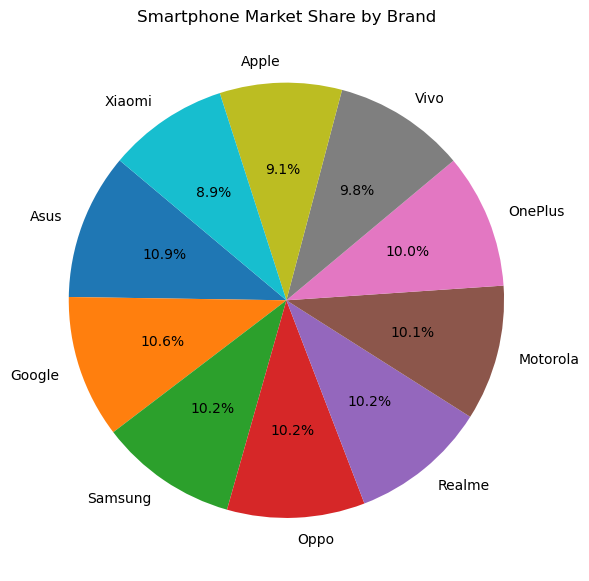

In [26]:
# Counting no.of phones by Brand
brand_counts = df_cleaned['brand'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    brand_counts,
    labels=brand_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)

plt.title("Smartphone Market Share by Brand")
plt.axis('equal')  
plt.tight_layout()
plt.show()

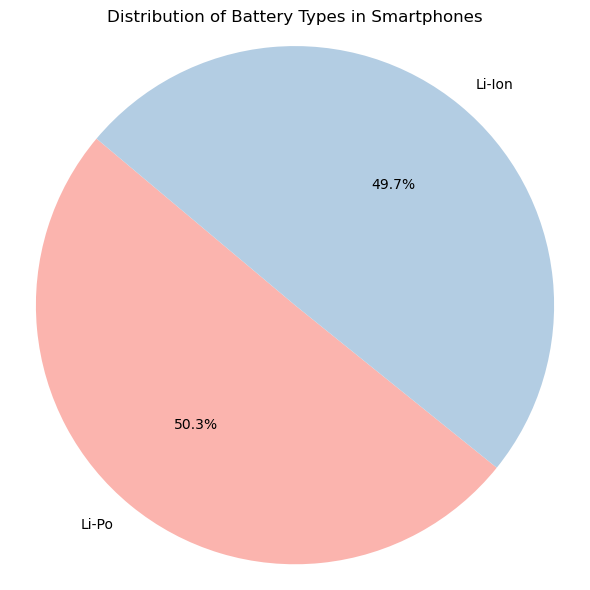

In [27]:
# Count different battery types
battery_counts = df_cleaned['battery_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(
    battery_counts,
    labels=battery_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title("Distribution of Battery Types in Smartphones")
plt.axis('equal')
plt.tight_layout()
plt.show()


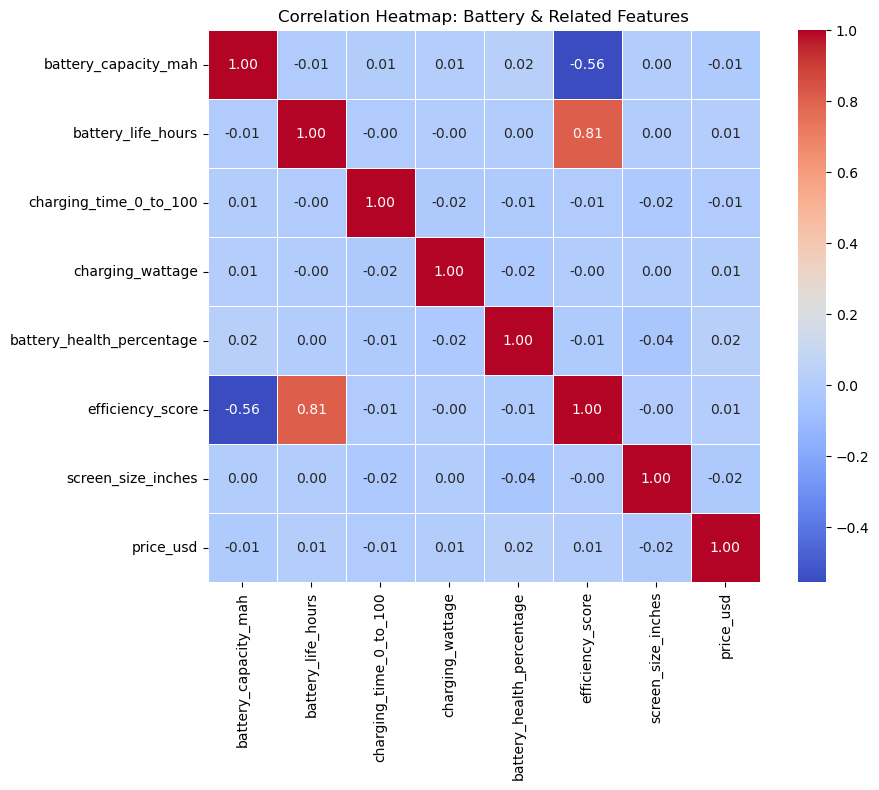

In [28]:
battery_related_cols = df_cleaned[[
    'battery_capacity_mah',
    'battery_life_hours',
    'charging_time_0_to_100',
    'charging_wattage',
    'battery_health_percentage',
    'efficiency_score',
    'screen_size_inches',
    'price_usd'
]]
# Compute correlation matrix
correlation_matrix = battery_related_cols.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5)
plt.title("Correlation Heatmap: Battery & Related Features")
plt.tight_layout()
plt.show()


## HISTOGRAM


Text(0.5, 0, 'Battery Capacity (mAh)')

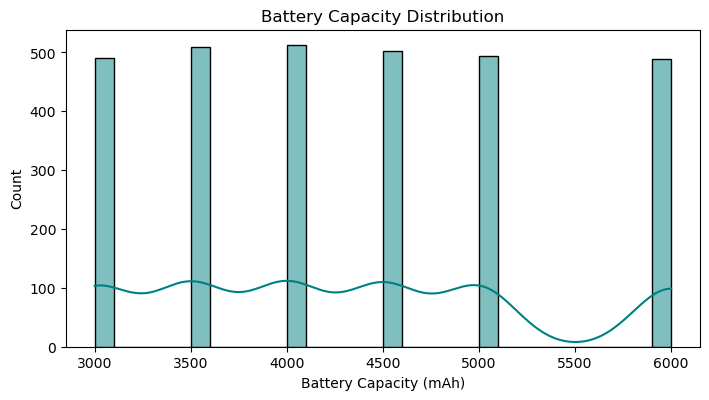

In [29]:
plt.figure(figsize=(18, 14))
plt.subplot(3, 2, 1)
sns.histplot(df_cleaned['battery_capacity_mah'], bins=30, kde=True, color='teal')
plt.title("Battery Capacity Distribution")
plt.xlabel("Battery Capacity (mAh)")

## BOXPLOT

<Axes: xlabel='category', ylabel='charging_time_0_to_100'>

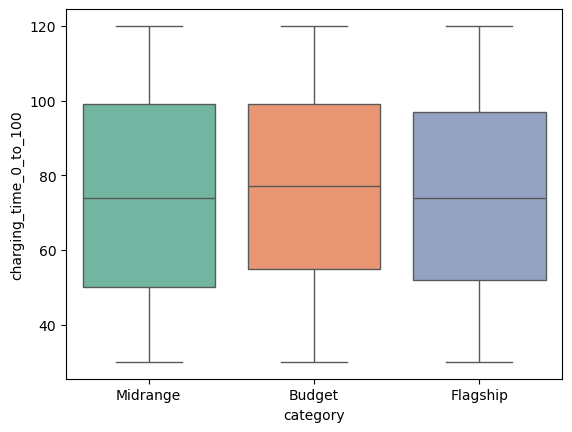

In [30]:
sns.boxplot(data=df_cleaned, x='category', y='charging_time_0_to_100', hue='category', palette='Set2', legend=False)

## BAR PLOT

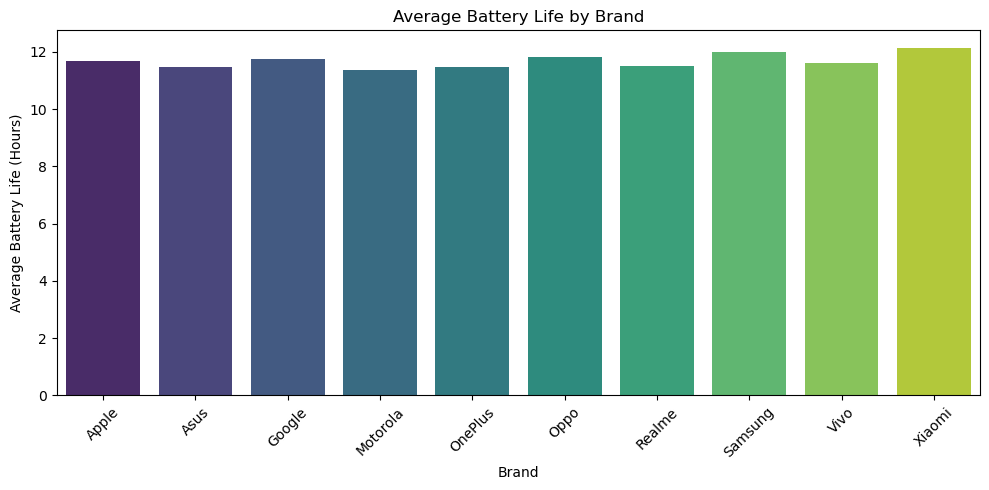

In [31]:
# Group by brand and calculate average battery life
avg_life_by_brand = df_cleaned.groupby('brand')['battery_life_hours'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_life_by_brand, x='brand', y='battery_life_hours', hue='brand', palette='viridis', legend=False)
plt.title("Average Battery Life by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Battery Life (Hours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='avg_health', ylabel='os'>

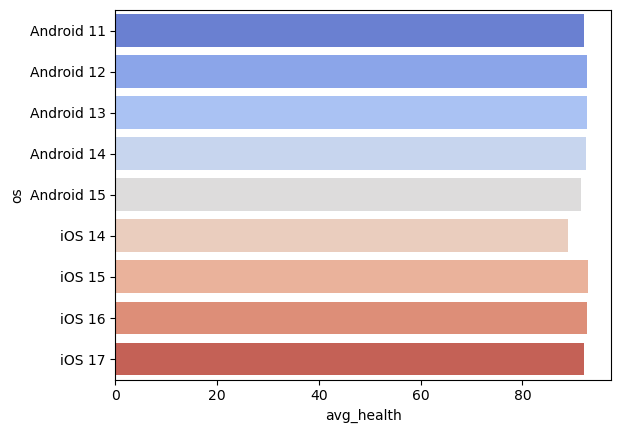

In [32]:
# Calculate average battery health by OS
avg_health_by_os = df_cleaned.groupby('os')['battery_health_percentage'].mean()

# Prepare DataFrame from the Series for easier plotting
avg_health_df = avg_health_by_os.reset_index(name='avg_health')
sns.barplot(data=avg_health_df, x='avg_health', y='os', hue='os', palette='coolwarm', legend=False)

## SCATTER PLOT

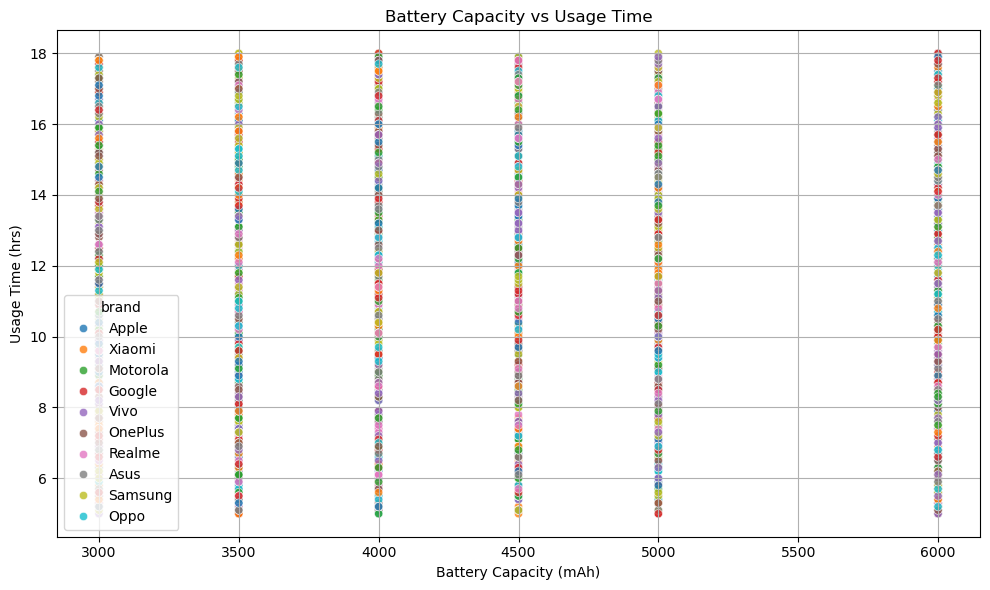

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='battery_capacity_mah',
    y='battery_life_hours',
    hue='brand',          
    palette='tab10',      
    alpha=0.8             
)

plt.title("Battery Capacity vs Usage Time")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Usage Time (hrs)")
plt.grid(True)
plt.tight_layout()
plt.show()